In [ ]:
# (1) install + import GetOldTweets3 + Pandas
# (2) define tweet scraping function | https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1
# (3) scrape twitter + store tweets to .csv files for each search term
# (4) merge .csv files + drop duplicates
# (5) clean final CSV | (a) separate #'s by column + (b) convert relevant strings to int????
# (5) inspect data | (a) rank-order hashtags + (b) users + (c)???????
# (6) Visualize core elements -- TBD?????????
# (7) GLM // Feature exploration


In [ ]:
# install 
# pip install -e git+https://github.com/Mottl/GetOldTweets3#egg=GetOldTweets3

In [1]:
#build the dataset 

import GetOldTweets3 as got
import pandas as pd

In [2]:
# # Parameters: (list of twitter usernames), (max number of most recent tweets to pull from)
# def username_tweets_to_csv(username, count):
#     # Creation of query object
#     tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
#                                             .setMaxTweets(count)
#     # Creation of list that contains all tweets
#     tweets = got.manager.TweetManager.getTweets(tweetCriteria)

#     # Creating list of chosen tweet data
#     user_tweets = [[tweet.date, tweet.text] for tweet in tweets]

#     # Creation of dataframe from tweets list
#     tweets_df = pd.DataFrame(user_tweets, columns = ['Datetime', 'Text'])

#     # Converting dataframe to CSV
#     tweets_df.to_csv('{}-{}k-tweets.csv'.format(username, int(count/1000)), sep=',')

In [35]:

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_csv(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count)\
                                            .setSince("2020-04-01")\
                                        .setUntil("2020-05-13")\
                                    .setEmoji("unicode")
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[
        tweet.id, #(str)
        tweet.permalink, #(str)
        tweet.username, #(str)
        tweet.to, #(str)
        tweet.retweets, #(int)
        tweet.favorites, #(int)
        tweet.mentions, #(str)
        tweet.hashtags, #(str)
        tweet.geo, #(str)
        tweet.date, #(datetime) in UTC
        tweet.text #(str)
    ] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = [
        'id',
        'permalink', 
        'username',
        'to',
        'retweets',
        'favorites',
        'mentions', 
        'hashtags',
        'geo', 
        'date',
        'text'
    ])

    # Converting tweets dataframe to csv file
    tweets_df.to_csv('{}-{}k-tweets.csv'.format(text_query, int(count/1000)), sep=',')

In [43]:
# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets matching search terms
text_query = '#5Gcoronavirus' or '5Gcoronavirus'
#count = 25000 <- no count = pulls every available tweet between defined function range

# Calling function to query X amount of relevant tweets and create a CSV file
text_query_to_csv(text_query, count)

In [ ]:
text_query = '#stop5G' or 'stop5G'

text_query_to_csv(text_query, count)

In [44]:
text_query = '#5G' or '5G'

text_query_to_csv(text_query, count)

In [45]:
text_query = '#5Gconspiracy' or '5Gconspiracy'

text_query_to_csv(text_query, count)

In [46]:
text_query = '#5Gtruth' or '5Gtruth'

text_query_to_csv(text_query, count)

In [48]:
text_query = '#5Gtowers' or '5Gtowers'

text_query_to_csv(text_query, count)

In [ ]:
text_query = '#5Gkills' or '5Gkills'

text_query_to_csv(text_query, count)

In [49]:
text_query = '#5Gcanada' or '5Gcanada'

text_query_to_csv(text_query, count)

In [50]:
text_query = '#nohuawei' or 'nohuawei'

text_query_to_csv(text_query, count)

In [52]:
text_query = '#no5G' or 'no5G'

text_query_to_csv(text_query, count)

In [53]:
text_query = '#5Gvirus' or '5Gvirus'

text_query_to_csv(text_query, count)

In [54]:
text_query = '#saynoto5G' or 'saynoto5G'

text_query_to_csv(text_query, count)

In [ ]:
# merge CSV files && drop duplicates

    # https://stackoverflow.com/questions/38172215/join-two-csv-files-with-pandas-python-without-duplicates

In [3]:
# import pandas as pd

df1=pd.read_csv("#5Gcoronavirus-10k-tweets.csv")
df2=pd.read_csv("#stop5G-10k-tweets.csv")
df3=pd.read_csv("#5Gconspiracy-10k-tweets.csv")
df4=pd.read_csv("#5Gtruth-10k-tweets.csv")
df5=pd.read_csv("#5Gtowers-10k-tweets.csv")
df6=pd.read_csv("#5Gcanada-10k-tweets.csv")
df7=pd.read_csv("#nohuawei-10k-tweets.csv")
df8=pd.read_csv("#5Gdangers-10k-tweets.csv")
df9=pd.read_csv("#no5G-10k-tweets.csv")
df10=pd.read_csv("#5Gvirus-10k-tweets.csv")
df11=pd.read_csv("#saynoto5G-10k-tweets.csv")

df_final=pd.concat([df1,
                    df2,
                    df3,
                    df4,
                    df5,
                    df6,
                    df7,
                    df8,
                    df9,
                    df10,
                    df11
                   ]).drop_duplicates(subset=[
    'id',
    'permalink', 
    'username',
    'to',
    'retweets',
    'favorites',
    'mentions', 
    'hashtags',
    'geo', 
    'date',
    'text'
]).reset_index(drop=True)

print(df_final.shape)

df_final2=df_final.drop_duplicates(subset=[    
    'id',
    'permalink', 
    'username',
    'to',
    'retweets',
    'favorites',
    'mentions', 
    'hashtags',
    'geo', 
    'date',
    'text'
]).reset_index(drop=True)

df_final2.to_csv('final.csv', index=False)

(18451, 12)


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
df = pd.read_csv("final.csv")
df.dropna()

,Unnamed: 0,id,permalink,username,to,retweets,favorites,mentions,hashtags,geo,date,text


In [60]:
df.head()

,Unnamed: 0,id,permalink,username,to,retweets,favorites,mentions,hashtags,geo,date,text
0,0,1260355202458300419,https://twitter.com/The_Right_Half/status/1260...,The_Right_Half,PierrePoilievre,1,2,@PierrePoilievre,#ObamaKnew #FauciLiedPeopleDied #BillGatesIsEv...,NaN,2020-05-12 23:44:31+00:00,.@PierrePoilievre we need someone to save Cana...
1,1,1260268307770486784,https://twitter.com/EndSkyDeathCult/status/126...,EndSkyDeathCult,NaN,3,5,NaN,#5Gcoronavirus,NaN,2020-05-12 17:59:13+00:00,stay woke #5Gcoronavirus
2,2,1260255634169135105,https://twitter.com/Katarzy46303333/status/126...,Katarzy46303333,modliszka30,0,0,NaN,#CoronaHoax #5GCoronaVirus #5G #FakeItUntilUMa...,NaN,2020-05-12 17:08:52+00:00,"Ciekawe, czy żydomasoński minister-tornister J..."
3,3,1260254548486172673,https://twitter.com/Katarzy46303333/status/126...,Katarzy46303333,htTweets,0,0,NaN,#5G #smartcity #CoronaHoax #5gCoronaVirus #Wuh...,NaN,2020-05-12 17:04:33+00:00,Of course nothing in Beijing. MB bcs Beijing i...
4,4,1260253317780955144,https://twitter.com/Katarzy46303333/status/126...,Katarzy46303333,DrEricDing,0,0,NaN,#CoronaHoax #5gCoronaVirus,NaN,2020-05-12 16:59:39+00:00,"GET THE FACTS ABOUT COVID, YOU BIGOT! #CoronaH..."


In [61]:
#Use the .str string accessor to perform string operations on DataFrames. In particular, you want .str.len:

df['text_length']  = df['text'].str.len()

In [62]:
hashtag_frequency = df.groupby('hashtags')['text_length'].sum().sort_values()

In [63]:
hashtag_frequency.head()

hashtags
#5gVirus         8
#5gcanada        9
#Saynoto5g      10
#No5G #NoHS2    12
#No5G #novax    12
Name: text_length, dtype: int64

In [64]:
# plt.figure(figsize=(6,10))
# plt.barh(hashtag_frequency.index, hashtag_frequency)

In [65]:
df['hashtag_length'] = df['hashtags'].str.len()

In [66]:
#df['mentions_numeric'] = df['mentions'].pd.to_numeric(errors='ignore')

In [67]:
hashtag_length = df.groupby('retweets')['hashtag_length'].sum().sort_values()

In [68]:
hashtag_length.head()

retweets
71     5.0
673    5.0
41     5.0
107    5.0
147    5.0
Name: hashtag_length, dtype: float64

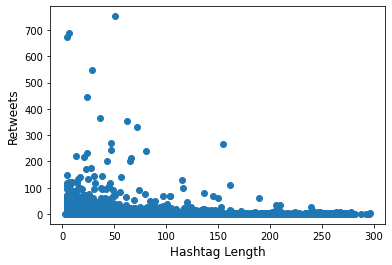

In [29]:
plt.figure()
plt.scatter(df['hashtag_length'],df['retweets'])
plt.xlabel('Hashtag Length', size=12)
plt.ylabel('Retweets', size=12)
plt.show()

In [30]:
plt.figure()
plt.scatter(df['date'],df['retweets'])
plt.xlabel('Date', size=12)
plt.ylabel('Retweets', size=12)
plt.show()

KeyboardInterrupt: 

In [69]:
df['hashtags'].nunique()

10729

In [76]:
df['hashtags'].value_counts()

#5GCoronavirus                                      1579
#No5G                                                783
#5GTOWERS                                            311
#5G #5GCoronavirus                                   265
#STOP5G                                              221
                                                    ... 
#wakeuphumans #COVID19Pandemic #5gconspiracy           1
#5GCoronavirus #BillGatesIsEvil                        1
#smartmeter #5GCoronavirus #privacy #5Gcrises          1
#5gconspiracy #tinfoilhelmets #wibble #beep            1
#corona #5G #covid19 #Media_Virus #5GCoronavirus       1
Name: hashtags, Length: 10729, dtype: int64

In [71]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns=500

import sklearn as sk
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, preprocessing

In [74]:
features_to_include = [   
    'favorites',
    'text_length',
    'hashtag_length'
]

In [75]:
feature_importances = feature_selection.mutual_info_regression(df[features_to_include],df['retweets'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
feat_importance_df = pd.DataFrame(list(zip(features_to_include,feature_importances)), columns=['feature','importance'])

In [ ]:
feat_importance_df.sort_values(by='importance', ascending=False, inplace=True)

In [ ]:
top_feats = [x for x in feat_importance_df['feature'][0:5]]
top_feats

In [ ]:
reg = sk.linear_model.LinearRegression()

In [ ]:
regfit = reg.fit(df[top_feats], df['retweets'])

In [ ]:
regfit.score(df[top_feats], df['retweets'])

In [ ]:
y_fit = regfit.predict(df[top_feats])

In [ ]:
plt.scatter(df['price'], y_fit)